In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# **The Table of Contents**
![Table Contents](https://github.com/Saransh482003/Image-hosting/blob/main/MLP%20Table%20Content.png?raw=true)

# **Exploratory Data Analysis**

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set()

## **Data Loading**

In [3]:
train = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

## **Checking for Null Values**

## **Insights💡**
#### 1. The data contains 6 numerical features and 10 categorical features.
#### 2. The ***contact*** and ***poutcomes*** features are heavily sparse, with over 25% null values.
#### 3. The ***job*** and ***education*** features have null values but thats not as extream as the other two features.

In [4]:
train

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,2008-07-31,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no
39207,2009-07-31,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no
39208,2008-06-02,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no
39209,2010-03-20,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no


In [5]:
data_descripter = pd.DataFrame(train.isnull().sum(), columns=["Null Count"])
data_descripter["Total"] = [train.shape[0]]*train.shape[1]
data_descripter["Null %"] = round((data_descripter["Null Count"]/train.shape[0])*100,2)
data_descripter["Type"] = [train[col].dtype for col in train.columns]
data_descripter

,Null Count,Total,Null %,Type
last contact date,0,39211,0.00,object
age,0,39211,0.00,int64
job,229,39211,0.58,object
marital,0,39211,0.00,object
education,1467,39211,3.74,object
default,0,39211,0.00,object
balance,0,39211,0.00,int64
housing,0,39211,0.00,object
loan,0,39211,0.00,object
contact,10336,39211,26.36,object


In [6]:
num_cols = data_descripter[data_descripter["Type"]=="int64"].index.tolist()
cat_cols = data_descripter[data_descripter["Type"]!="int64"].index.tolist()
len(num_cols), len(cat_cols)

(6, 10)

## **Numerical Feature Analysis**

## **Insights💡**
#### 1. The 3 quantile values of features ***pdays*** and ***previous*** are -1 and 0 respectively, meaning majority of the feature contains a constant value. This is the reason they have an absurd box-plot.
#### 2. The ***age*** column holds less correlation with other numerical variables as well as the target variable.
#### 3. The ***duration*** feature have a strong correlation with the target variable, making it a significant feature.

In [7]:
train[num_cols].describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


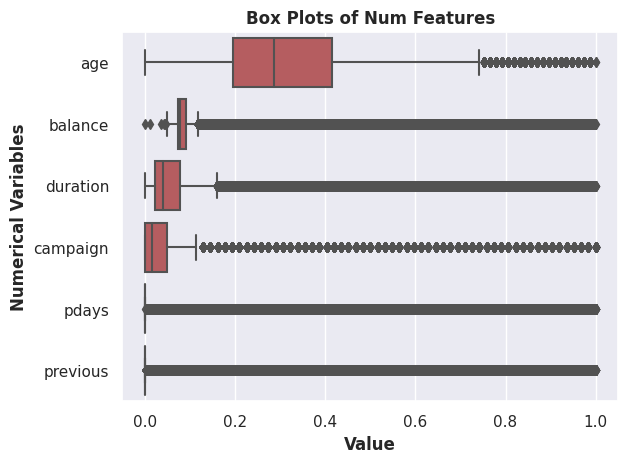

In [8]:
sns.boxplot(MinMaxScaler().fit_transform(train[num_cols]),color="r",orient="h")
plt.title("Box Plots of Num Features",fontweight="bold")
plt.xlabel("Value",fontweight="bold")
plt.ylabel("Numerical Variables",fontweight="bold")
plt.yticks(ticks=[0,1,2,3,4,5],labels=num_cols)
plt.show()

## **Distribution Check**

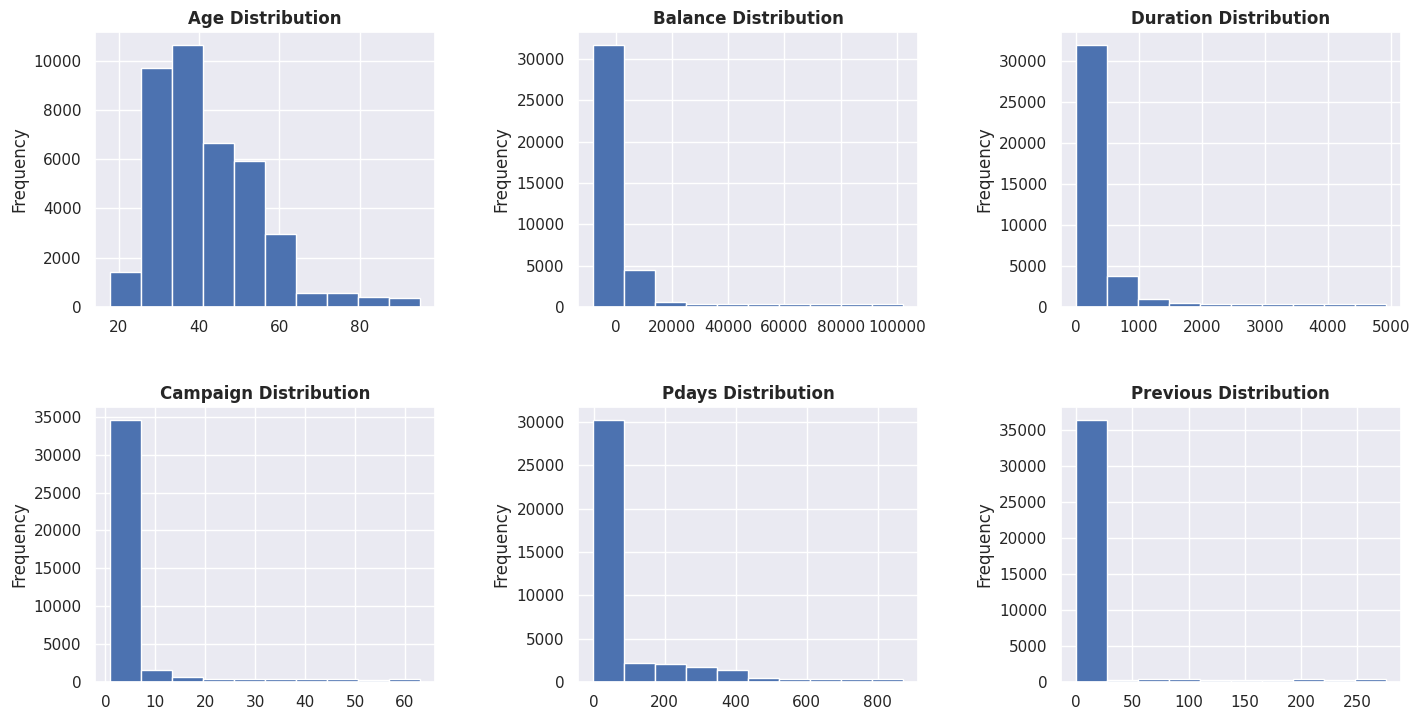

In [9]:
fig, axes = plt.subplots(2,3, figsize=(15,8))
for i,j in enumerate(num_cols):
    row,col = divmod(i,3)
    train[j].plot(kind="hist",ax=axes[row,col])
    axes[row,col].set_title(f"{j[0].upper()+j[1:]} Distribution",fontweight="bold")
fig.tight_layout(pad=3.0)
plt.show()

## **Correlation Matrix**

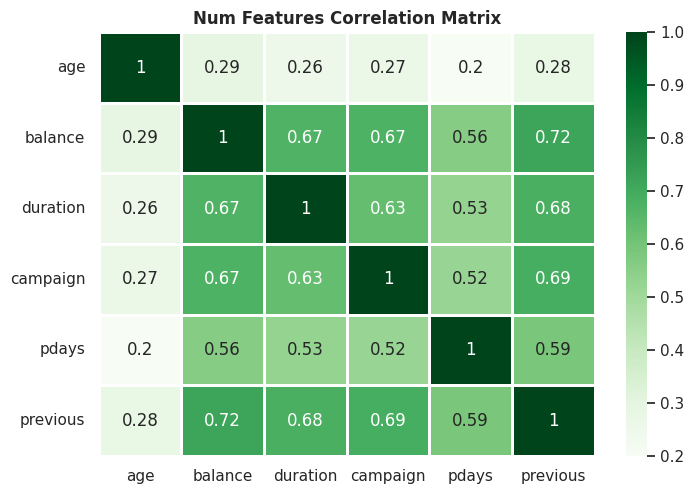

In [10]:
plt.figure(figsize=(8,5.5))
sns.heatmap(train[num_cols].corr(),cmap="Greens",annot=True,linecolor="white",linewidths=1)
plt.title("Num Features Correlation Matrix", fontweight="bold")
plt.yticks(rotation=0)
plt.show()

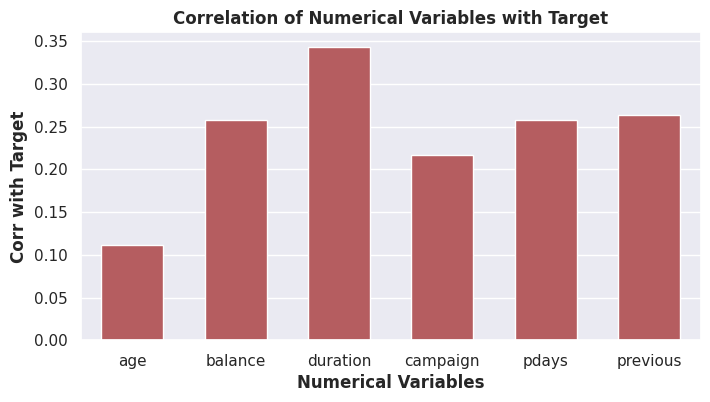

In [11]:
plt.figure(figsize=(8,4))
targets = train["target"].replace({"yes":1,"no":0})
target_corr = [train[col].corr(targets) for col in num_cols]
sns.barplot(x=num_cols,y=target_corr, color="r",width=0.6)
plt.title("Correlation of Numerical Variables with Target",fontweight="bold")
plt.xlabel("Numerical Variables",fontweight="bold")
plt.ylabel("Corr with Target",fontweight="bold")
plt.show()

## **Categorical Feature Analysis**

## **Insights💡**
#### 1. The ***poutcome*** feature despite being over 75% null values holds a heavy correlation with the target variable. This is due to the fact that 75% of the people being contacted are new and have not been contacted before. This means ***we can NOT remove this column***.
#### 2. The ***contact*** feature having more than 25% null values has a nearly low correlation with the target. This means this column is expendable and can be either removed or imputed.
#### 3. The ***job*** feature has a really good correlation with the target. This means this column should be imputed.
#### 4. The ***last contact date*** column is not much useful as it's continuous but can't be treated as a numerical column.
#### 5. The above used formula to calculate association is called **Cramér's V Formula**
![](https://github.com/Saransh482003/Image-hosting/blob/main/Cramers%20V.png?raw=true)

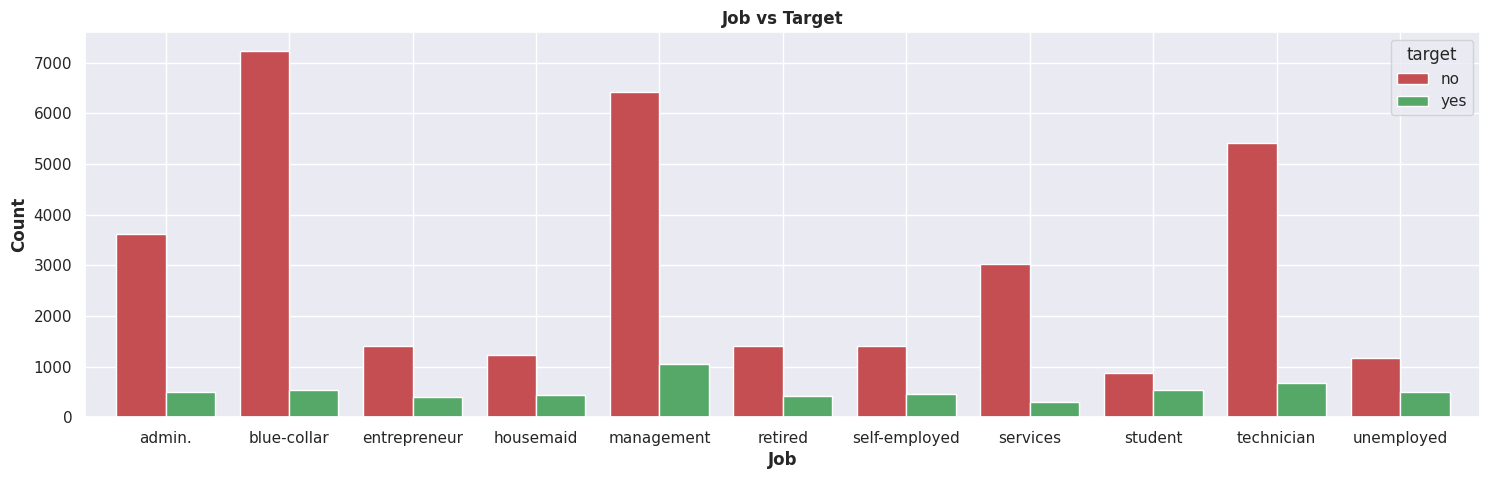

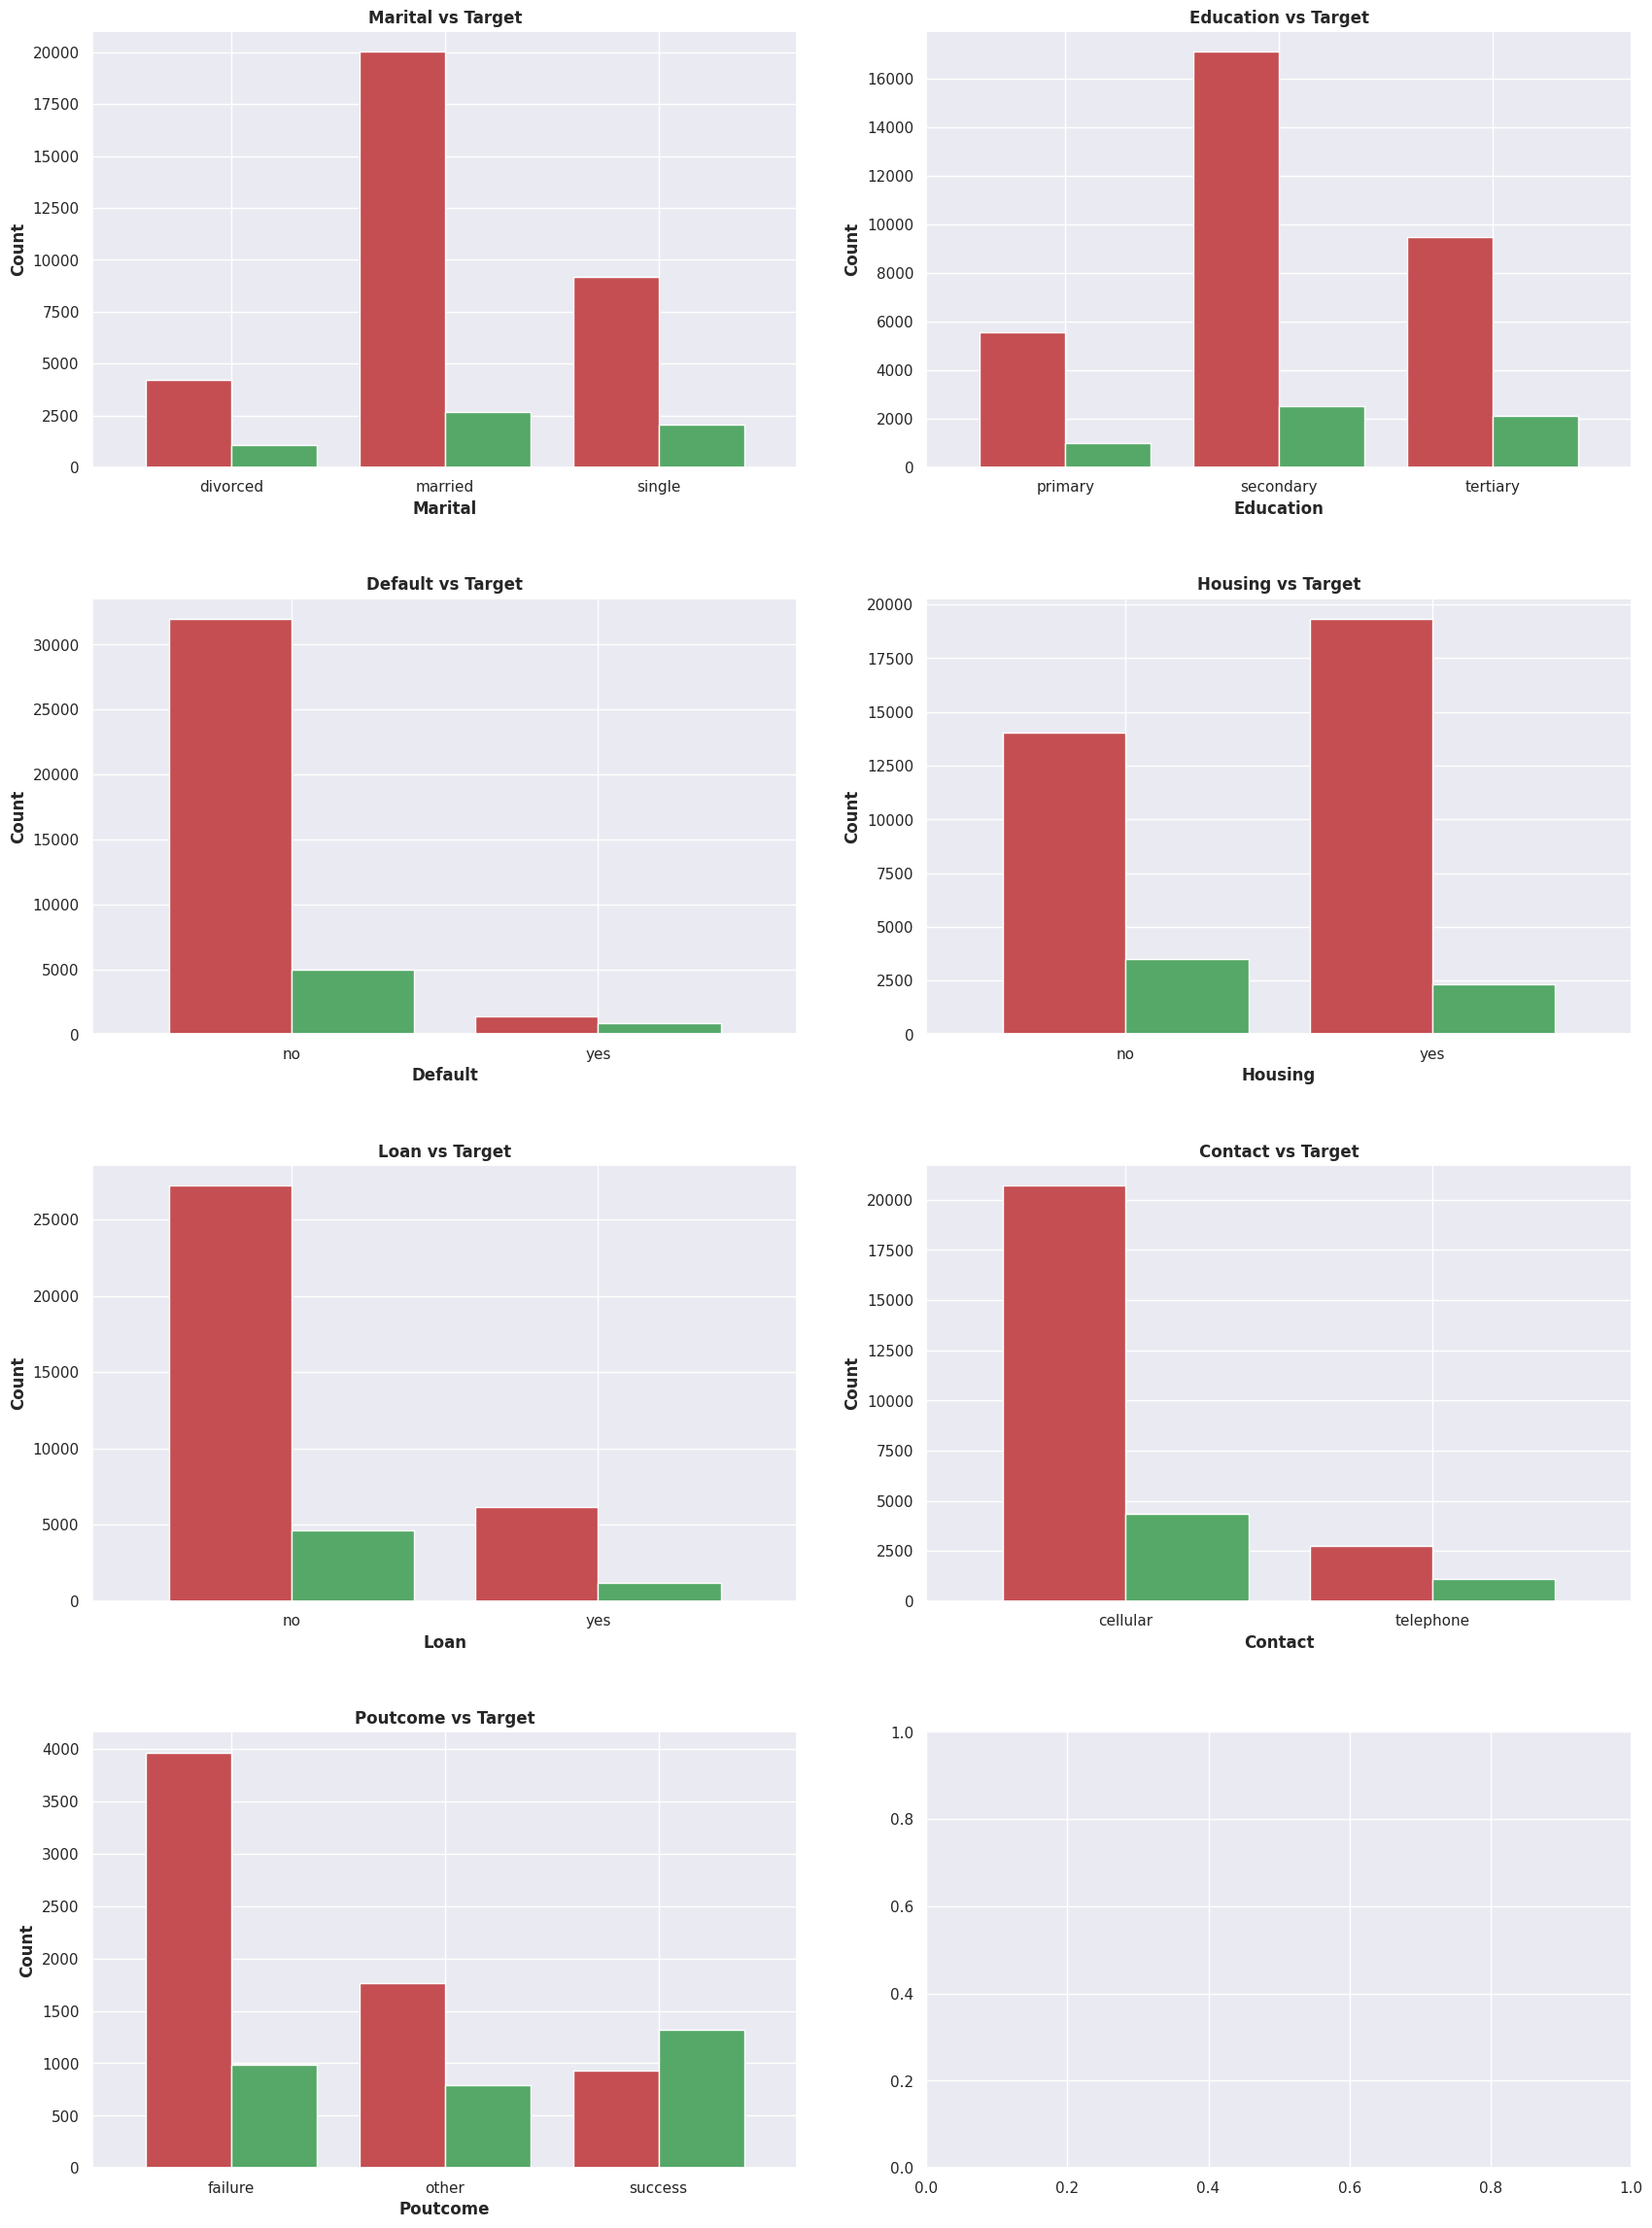

In [12]:
pd.crosstab(train["job"],train["target"]).plot(kind="bar",figsize=(18,5),width=0.8,color=["r","g"])
plt.xticks(rotation=0)
plt.title("Job vs Target",fontweight="bold")
plt.xlabel("Job",fontweight="bold")
plt.ylabel("Count",fontweight="bold")

fig, axes = plt.subplots(4, 2, figsize=(18, 24))
fig.tight_layout(pad=5.0)
for x,col in enumerate(cat_cols[2:-1]):
    row, col_idx = divmod(x, 2)
    pd.crosstab(train[col],train["target"]).plot(kind="bar",width=0.8,color=["r","g"],ax=axes[row,col_idx],legend=False)
    axes[row, col_idx].set_title(f"{col[0].upper()+col[1:]} vs Target",fontweight="bold")  
    axes[row, col_idx].set_xlabel(col[0].upper()+col[1:],fontweight="bold")
    axes[row, col_idx].set_ylabel("Count",fontweight="bold")
    axes[row, col_idx].tick_params(axis='x',labelrotation=0)
plt.subplots_adjust(hspace=0.3)
plt.show()

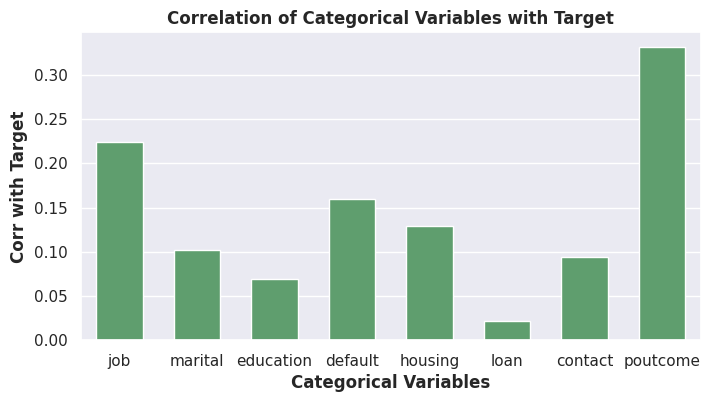

In [13]:
plt.figure(figsize=(8,4))
from scipy.stats import chi2_contingency

def cramer_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

association = [cramer_v(train[i],train["target"]) for i in cat_cols[1:-1]]
sns.barplot(x=cat_cols[1:-1],y=association, color="g",width=0.6)
plt.title("Correlation of Categorical Variables with Target",fontweight="bold")
plt.xlabel("Categorical Variables",fontweight="bold")
plt.ylabel("Corr with Target",fontweight="bold")
plt.show()

## **Insights💡**
#### The data is heavily imbalanced against the ***"yes"*** class. The majority class exceeds the minority by

In [14]:
target_analysis = train["target"].value_counts()
print(target_analysis)
print("Exceed by : ",(target_analysis[0]-target_analysis[1])/target_analysis[0])

target
no     33384
yes     5827
Name: count, dtype: int64
Exceed by :  0.8254553079319434


# **Data Preprocessing**

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [16]:
train["last contact date"] = pd.to_datetime(train["last contact date"])
train['days_since_last_contact'] = (pd.to_datetime("31-12-2010") - train['last contact date']).dt.days
test["last contact date"] = pd.to_datetime(test["last contact date"])
test['days_since_last_contact'] = (pd.to_datetime("31-12-2010") - test['last contact date']).dt.days

In [17]:
train.drop("last contact date",axis=1,inplace=True)
test.drop("last contact date",axis=1,inplace=True)

#### **Explanation✅**: The ***last contact date*** column though not being much useful, can be transformed into a column containing the number of days since the last contact. This is computed by putting the *maximum date value* as the pivot and subtracting the date from that. Now we have a numerical column. After this the date column is removed.

In [18]:
train["poutcome"].fillna("no contact",inplace=True)
test["poutcome"].fillna("no contact",inplace=True)

#### **Explanation✅**: The ***poutcome*** column is the most significant categorical feature in the data. Neither it can be removed, not be imputed. This is because the ***poutcome*** is missing values where the person was not contacted in the previous campaign. Meaning these 75% people are actually new to the system. So, it doesn't make sense to impute these values.

In [19]:
x_train, y_train = train.drop(["target"],axis=1), train["target"]
test_x = test.copy()

In [20]:
y_train.replace({"no":0,"yes":1},inplace=True)

## **Feature Transformations and Pipelining**

In [21]:
imputer_transformations = ColumnTransformer([
    ("ohe", OneHotEncoder(handle_unknown="ignore"),[1,2,3,8,13]),
    ("binary_ohe", OneHotEncoder(drop="if_binary"),[4,6,7]),
    ("scaling", MinMaxScaler(),[0,5,9,10,11,12,14]),
],remainder="passthrough")

#### **Explanation✅**: The 4 features with null values would be handled using **KNN Imputation**. 
#### KNN imputer works only with ***numerical values***, so for this to work the data needs to be preprocessed. Categorical Variables were put under **One-Hot Encoding** while the Numerical Variables were put under **Min-Max Scaling**. 
#### Standard Scaler couldn't be used as that **hampers the Eucleadian Distances**.

In [22]:
final_transofmation = ColumnTransformer([ 
    ("scaling", MinMaxScaler(),[29,30,31,32,33,34,35]),
],remainder="passthrough")

#### **Explanation✅**: Finally the imputed dataset was again put under **Min-Max Scaling** to account for the newly imputer numerical values.

In [23]:
pipe = Pipeline([
    ("imputer_tranformations", imputer_transformations),
    # ("iterative",IterativeImputer(estimator=xgb.XGBRegressor(),max_iter=15,random_state=46)),
    ("iterative",KNNImputer(n_neighbors=10)),
    ("final_transofmation", final_transofmation),
    # ("pca",PCA())
])

#### **Explanation✅**: All these transformers were put in a pipeline along with the imputer. I tried using **Iterative Imputer with XGBRegressor** as the estimator and surprisingly it gave exactly the same results as the KNN Imputer, only a bit slower. I experimented a lot with the **n_neighbors** parameter, finally settled with this.

In [24]:
x_train_tranf = pd.DataFrame(pipe.fit_transform(x_train))
test_x_tranf = pd.DataFrame(pipe.transform(test_x))

In [25]:
y_train = y_train.replace({"yes":1,"no":0})

## **Train Test Split**

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_tranf,y_train, 
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [27]:
x_train["target"] = y_train
x_train.to_csv("preprocessed_train.csv",index=False)
test_x_tranf.to_csv("preprocessed_test.csv",index=False)

#### **Explanation✅**: The preprocessed datasets were stored in separate csv files to maintain code-readability and cleanliness.

# **Over-Sampling the Preprocessed Data**

In [28]:
df = pd.read_csv("preprocessed_train.csv")

In [29]:
x = df.drop("target", axis=1)
y = df["target"]

## **Insights💡**
#### 1. Training a model on a **heavily imbalanced dataset** would produce biased results toward the majority class.
#### 2. To counter this over-sampling techniques were employed to swell up the number of minority class data points using **Synthetic Minority Oversampling Technique (SMOTE).**
#### 3. Under-sampling techniques were also used but as expected the results were **NOT** satisfactory.
#### 4. There are several over-sampling techniques, like SMOTE, SVMSMOTE, SMOTENC, BorderlineSMOTE, KMeansSMOTE and also SMOTEENN and SMOTETomek. But out of all these **SVMSMOTE** performed the best.

In [30]:
from imblearn.over_sampling import SVMSMOTE
from sklearn.svm import SVC
# over = SVMSMOTE(random_state=42,svm_estimator=SVC(kernel="poly",degree=3,C=1,gamma="scale",class_weight=None)) # Using Polynomial Kernel for sampling
# x_train, y_train = over.fit_resample(x, y)

# **The Training of 8 Models**

In [31]:
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

from sklearn.model_selection import ParameterSampler
from sklearn.metrics import make_scorer, f1_score

In [32]:
## A custom scoring metric according to the competition scoring metric
f1_scorer = make_scorer(f1_score, average="macro")

In [33]:
def ParamSampler(n_iter, estimator, param_grid):
    random_params = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))
    best_score = -np.inf
    best_params = None
    best_model = None
    for i,params in enumerate(random_params):
        model = estimator(**params, random_state=42) # Initiating the Estimator
        model.fit(x_train, y_train)
        
        y_pred = model.predict(x_test)
        test_score = f1_score(y_test, y_pred, average='macro') # Measuring the F1-Score of the model
        print(i,test_score)
        if test_score > best_score: # This was done to find the best model
            best_score = test_score
            best_params = params
            best_model = model
    return best_score, best_model

#### **Explanation✅**: The ParamSampler function leverages the power of ParameterSampler() and allows us to select the best parameters which produce the best f1-score. This function was repeatedly used to find the best set of parameters for the 6 estimators listed below.

## **Dummy Classifier**
#### 1. The Dummy Classifier Model produced a f1-score of 0.458.
#### 2. This was expected as we are dealing with a binary classification problem, had there been more than two classes the score would have hit rock bottom.

In [34]:
# dummy_model = DummyClassifier(strategy="most_frequent")
# dummy_model.fit(x_train, y_train)
# print(f1_score(y_test, dummy_model.predict(x_test), average="macro"))

## **Logistic Regression**
#### 1. The Logistic Regression Model produced a f1-score of 0.702.
#### 2. A massive improvement from the Dummy Model.

In [35]:
# log_model = LogisticRegression(
#     **{"solver":"saga",
#        "max_iter":200,
#        "penalty":"l1",
#        "C":100}
# )
# log_model.fit(x_train, y_train)
# print(f1_score(y_test, log_model.predict(x_test), average="macro"))

## **Support Vector Machines**
#### 1. The SVM Model produced a f1-score of ***0.69***, after appropriate hyper-parameter tuning.
#### 2. This is a slight downgrade from the Logistic Regression Model.
#### 3. This could be attributed to the ***inability to perform proper hyper-parameter tuning*** due to the ***incredibly high amount of run time (3 mins)*** it consumes to train one model.

In [36]:
# svm_model = SVC(
#     **{'kernel': 'poly', 
#        'gamma': 3, 
#        'degree': 4,
#        'C': 10})
# svm_model.fit(x_train, y_train)
# print(f1_score(y_test, svm_model.predict(x_test), average="macro"))

## **Multi-Layer Perceptron**
#### 1. The MLP Model produced a f1-score of ***0.7333***, after appropriate hyper-parameter tuning.
#### 2. This is a massive improvement from the LogisticRegression Model.

In [37]:
# param_grid = {
#     'hidden_layer_sizes': [(64, 32), (128, 64), (100,), (64,)],
#     'activation': ['relu', 'tanh'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate_init': [0.0001, 0.001, 0.01],
#     'solver': ['adam', 'sgd'],
#     'batch_size': [32, 64, 128],
#     'max_iter': [500,750,1000],
#     'early_stopping': [True]
# }
# ParamSampler(10,MLPClassifier,param_grid)

In [38]:
# mlp_model = MLPClassifier(
#     **{'solver': 'sgd',
#      'max_iter': 1000,
#      'learning_rate_init': 0.01,
#      'hidden_layer_sizes': (128, 64),
#      'early_stopping': True,
#      'batch_size': 32,
#      'alpha': 0.0001,
#      'activation': 'tanh'}
# )
# mlp_model.fit(x_train, y_train)
# f1_score(y_test, mlp_model.predict(x_test),average="macro")

## **Balanced Random Forest Classifier**
#### 1. The BRF Model produced a f1-score of ***0.7605***, after appropriate hyper-parameter tuning.
#### 2. This is an improvement from the previous MLPClassifier, and it ***crosses the cut-off of .75***.

In [39]:
# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [1, 2, 4],
# }
# ParamSampler(10,BalancedRandomForestClassifier,param_grid)

In [40]:
# brf_model = BalancedRandomForestClassifier(
#     **{'n_estimators': 500,
#      'min_samples_split': 10,
#      'min_samples_leaf': 4,
#      'max_depth': 30}
# )
# brf_model.fit(x_train, y_train)
# f1_score(y_test, brf_model.predict(x_test),average="macro")

## **Light Gradient Boosting Machine**
#### 1. The LGBM Model produced a f1-score of ***0.767***, after appropriate hyper-parameter tuning.
#### 2. An improvement from the previous RBF Model.
#### 3. This improvement solidifies the assumption that ***ensembling models are the key to solve this problem***.

In [41]:
# param_grid = {
#     "n_estimators": np.arange(600, 1200, 100),
#     "max_depth": [3, 5, 7, 10, -1],
#     "learning_rate": [0.01, 0.05, 0.1, 0.2],
#     "feature_fraction": [0.6, 0.8, 1.0],
#     "subsample": [0.6, 0.8, 1.0],
#     "subsample_freq": [1],
#     "min_child_samples": [10, 20, 50, 100],
#     "num_leaves": [31, 63, 127, 255],
#     "metric": ["auc", "binary_logloss"],
#     "reg_lambda": [0, 2, 4, 6, 8],
#     "reg_alpha": [0, 2, 4, 6, 8],
#     "verbose":[-1]
# }
# ParamSampler(5,lgb.LGBMClassifier,param_grid)

In [42]:
# lgb_model = lgb.LGBMClassifier(
#     **{'verbose': -1,
#       'subsample_freq': 1,
#       'subsample': 0.8,
#       'reg_lambda': 4,
#       'reg_alpha': 8,
#       'num_leaves': 31,
#       'n_estimators': 1100,
#       'min_child_samples': 20,
#       'metric': 'binary_logloss',
#       'max_depth': -1,
#       'learning_rate': 0.01,
#       'feature_fraction': 1.0}
# )
# lgb_model.fit(x_train, y_train)
# f1_score(y_test, lgb_model.predict(x_test),average="macro")

## **Xtreme Gradient Boosting🟢**
#### 1. The XGB Model produced a f1-score of ***0.773***, after appropriate hyper-parameter tuning.
#### 2. This is a massive improvement from the previous LBGM Model.
#### 3. The model gives by-far ***the best results in the submission***.

In [43]:
# param_grid= {
#     "n_estimators":np.arange(400,1600,100),
#     "max_depth":[2,3,4,5,6,7,8,9,10,11,12],
#     "learning_rate":[0.01,0.05,0.1,0.15,0.20,0.25],
#     "colsample_bytree":[0.2,0.4,0.6,0.8,1.0],
#     "subsample":[0.2,0.4,0.6,0.8,1.0],
#     "min_child_weight":[1,3,5,7,9,11,13,15],
#     "gamma":[1,3,5,7,9,11,13,15],
#     "eval_metric":["auc","logloss",f1_scorer],
#     "reg_lambda":[0,2,4,6,8,10],
#     "reg_alpha":[0,2,4,6,8,10],
# }
# ParamSampler(5,xgb.XGBClassifier,param_grid)

In [44]:
from imblearn.over_sampling import SVMSMOTE
from sklearn.svm import SVC, NuSVC
# for i in np.random.randint(1,1000,size=10):
over = SVMSMOTE(random_state=42,svm_estimator=NuSVC(kernel='poly', nu=0.2, gamma=0.1, degree=3, random_state=42)) # Using Polynomial Kernel for sampling
x_train, y_train = over.fit_resample(x, y)
best_score,best_seed=0,0
# for i in np.random.randint(0,1000,size=250):
xgb_model = xgb.XGBClassifier(
    **{'subsample': 1.0,
      'reg_lambda': 4,
      'reg_alpha': 4,
      'n_estimators': 1100,
      'min_child_weight': 3,
      'max_depth': 9,
      'learning_rate': 0.15,
      'gamma': 3,
      'eval_metric': 'logloss',
      'colsample_bytree': 0.2},
        use_label_encoder=False,
        random_state=76,
        # random_state=i
)
xgb_model.fit(x_train, y_train)
score = f1_score(y_test, xgb_model.predict(x_test), average="macro")
    # print(score)
#     if score>best_score:
#         best_score=score
#         best_seed=i
#     print(i,score)
# print(f"Best Score: {best_score} Best Seed: {best_seed}")

In [45]:
score

0.7755424033055611

#### **Explanation✅**: Interestingly, it was observed that different values of ***random_state*** parameter produces different results. For instance I was able to achieve the score of 0.776 on the leaderboard by using the ***235*** seed value.

## **Stacking Classifier**
#### 1. The Stacking Classifier combines LGBM and XGB models, using LogisticRegression to learn from their outputs.
#### 2. A slight improvement was observed with a score of ***0.774***, but that wasn't the case with the submission score which was ***0.769***.

In [46]:
# from sklearn.ensemble import StackingClassifier, RandomForestClassifier
# estimators = [
#     ('lgb', lgb_model),
#     ('xgb', xgb_model)
# ]

# # Define the meta-model
# stacking_model = StackingClassifier(
#     estimators=estimators,
#     final_estimator=LogisticRegression(),
#     cv=5  # Cross-validation within the stacking classifier
# )
# stacking_model.fit(x_train, y_train)
# print(f1_score(y_test, stacking_model.predict(x_test), average="macro"))

# **Model Selection**

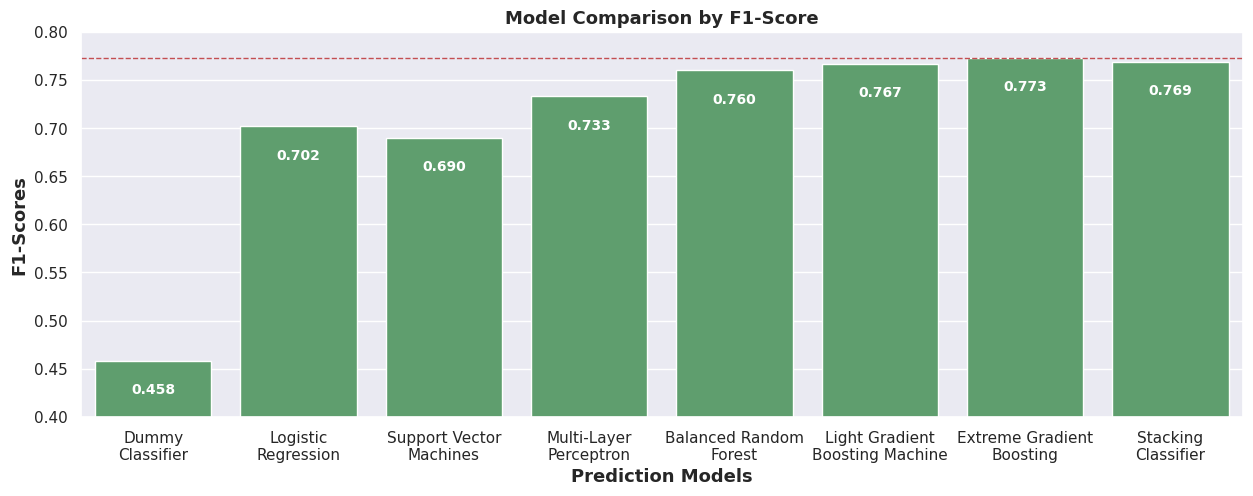

In [47]:
plt.figure(figsize=(15,5))
models = ["Dummy\nClassifier","Logistic\nRegression","Support Vector\nMachines","Multi-Layer\nPerceptron",
          "Balanced Random\nForest","Light Gradient\nBoosting Machine","Extreme Gradient\nBoosting","Stacking\nClassifier"]
scores = [0.458,0.702,0.69,0.733,0.76,0.767,0.773,0.769]
ax=sns.barplot(x=models,y=scores, color="g")
max_score = max(scores)
plt.axhline(y=max_score, color='r', linestyle='--', linewidth=1, label=f'Max Score: {max_score:.3f}')
plt.ylim(0.4,0.8)
plt.xticks(ticks=range(len(models)), labels=models)
plt.xlabel("Prediction Models",fontweight="bold",fontsize=13)
plt.ylabel("F1-Scores",fontweight="bold",fontsize=13)
plt.title("Model Comparison by F1-Score",fontweight="bold",fontsize=13)
for index, score in enumerate(scores):
    ax.text(index, score - 0.03, f'{score:.3f}', ha='center', va='center', fontsize=10, weight="bold",color='white')
plt.show()

In [48]:
y_preds = xgb_model.predict(x_test)

# **Evaluating the Model**

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

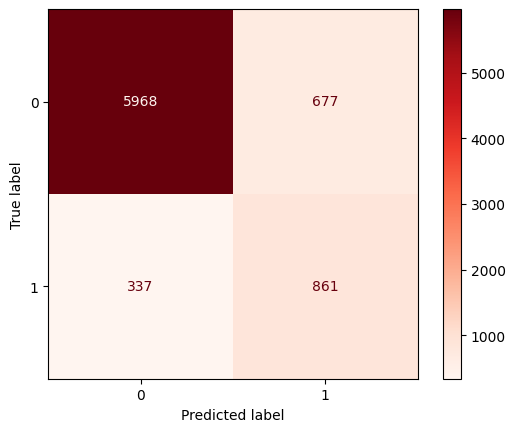

In [50]:
sns.reset_orig() # Reseting to default settings to get rid of grid lines
from sklearn.metrics import confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,cmap="Reds")
plt.show()

In [51]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      6645
           1       0.56      0.72      0.63      1198

    accuracy                           0.87      7843
   macro avg       0.75      0.81      0.78      7843
weighted avg       0.89      0.87      0.88      7843



## **Insights💡** 
#### Looks like the metrics for class 1 are on the lower side as compared to there counterparts. This can be attributed to the heavy imbalance of data samples against class 1. Even employing over-sampling techniques couldn't bridge this gap.

## **Predicting the Test Data**

In [52]:
submission = pd.DataFrame()

In [53]:
test_x = pd.read_csv("preprocessed_test.csv")

In [54]:
submission["id"] = np.arange(0,test_x.shape[0])
submission["target"] = xgb_model.predict(test_x)

In [55]:
submission["target"].replace({0:"no",1:"yes"}, inplace=True)

In [56]:
submission.to_csv("submission.csv",index=False)

In [57]:
submission["target"].value_counts()

target
no     8053
yes    1947
Name: count, dtype: int64

In [58]:
import os
os.listdir()

['preprocessed_test.csv',
 '__notebook__.ipynb',
 'preprocessed_train.csv',
 'submission.csv']